In [1]:
import pandas as pd
import numpy as ny
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Exploratory Data Analysis(EDA)

In [2]:
train = pd.read_csv('/Volumes/Transcend/gwu_course/ml1/project/data_train.csv')

In [3]:
train.shape

(494932, 111)

In [4]:
train.DIED.value_counts()

0.0    484319
1.0     10077
Name: DIED, dtype: int64

In [4]:
train.describe()

,AGE,AMONTH,ASOURCE,ATYPE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DQTR,DXCCS1,...,CM_OBESE,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS
count,494898.000000,494930.000000,494932.000000,494932.000000,494930.000000,494396.000000,494932.000000,494396.000000,494932.000000,494614.000000,...,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000,494932.000000
mean,52.883879,6.443022,3.824030,1.826384,0.195218,0.020382,5.030307,2.727296,2.483408,187.461629,...,0.091324,0.020639,0.046196,0.045889,0.018035,0.088077,0.018441,0.000333,0.033861,0.034684
std,25.811078,3.443515,1.760121,1.003085,0.396368,0.141305,0.390965,3.304773,1.116190,155.907248,...,0.288069,0.142173,0.209910,0.209245,0.133077,0.283407,0.134540,0.018256,0.180872,0.182977
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.705787,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.836384,1.000000,1.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,6.000000,5.000000,1.000000,0.000000,0.000000,5.091242,1.000000,2.000000,152.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,9.000000,5.000000,3.000000,0.000000,0.000000,5.369309,5.000000,3.000000,218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110.000000,12.000000,5.000000,6.000000,1.000000,1.000000,6.340997,99.000000,4.000000,670.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
target = pd.DataFrame(train, columns=['ASOURCE', 'ATYPE', 'RACE', 'TOTCHG', 'ZIPINC_QRTL'])
target.head(5)
#'ASOURCE', 'ATYPE', 'RACE', 'TOTCHG', 'ZIPINC_QRTL'

,ASOURCE,ATYPE,RACE,TOTCHG,ZIPINC_QRTL
0,2,2,1,272123,3
1,2,2,1,209246,1
2,2,2,1,305474,1
3,2,2,1,202973,1
4,2,2,1,416072,1


## Check the distribution of labels

AttributeError: module 'seaborn' has no attribute 'plt'

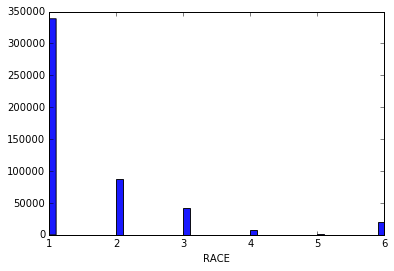

In [6]:
sns.distplot(train['RACE'], kde = False, color = 'b', hist_kws={'alpha': 0.9})
sns.plt.show()


## Categorical Features

## Numerical Features

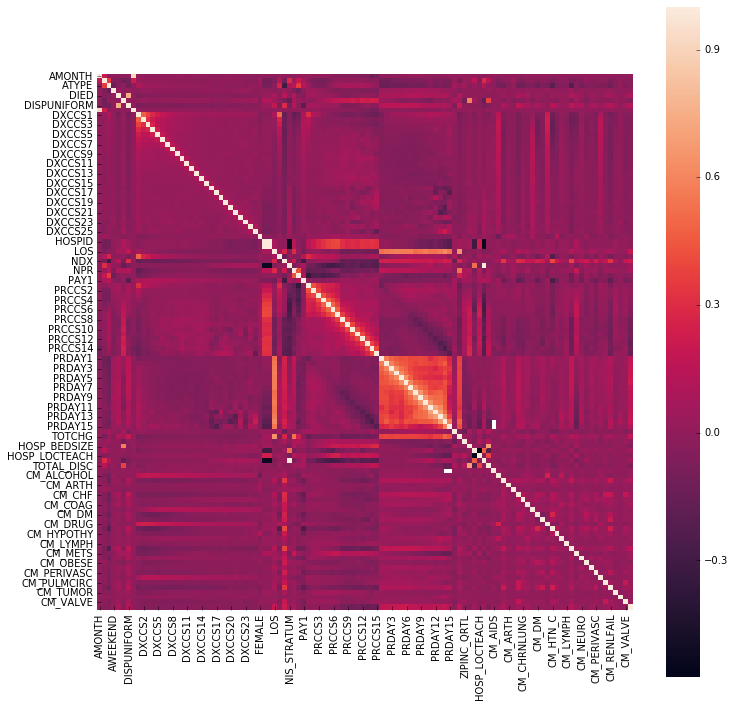

In [10]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
len(corr.columns)

110

In [14]:
target.describe()

,ASOURCE,ATYPE,RACE,TOTCHG,ZIPINC_QRTL
count,494932.000000,494932.000000,494932.000000,4.949320e+05,494932.000000
mean,3.824030,1.826384,1.588849,2.263266e+04,2.635423
std,1.760121,1.003085,1.139315,3.813394e+04,1.191758
min,1.000000,1.000000,1.000000,1.000000e+02,1.000000
25%,1.000000,1.000000,1.000000,6.067000e+03,1.000000
50%,5.000000,1.000000,1.000000,1.198200e+04,3.000000
75%,5.000000,3.000000,2.000000,2.511700e+04,4.000000
max,5.000000,6.000000,6.000000,1.461234e+06,4.000000


In [8]:
target.ASOURCE.plot()

(array([ 338808.,       0.,   87641.,       0.,   41343.,       0.,
           6912.,       0.,     763.,   19465.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

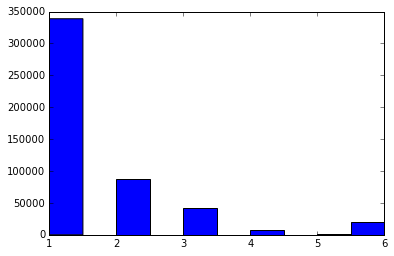

In [8]:
plt.hist(train.RACE)

## Missing Value Imputation

In [201]:
dxccs = list(na.index[na.index.str.contains('DXCCS')])

In [204]:
prday = list(na.index[na.index.str.contains('PRDAY')])

In [205]:
prccs = list(na.index[na.index.str.contains('PRCCS')])

In [230]:
t = train[dxccs+prccs+prday].fillna(0)
t.shape

(494932, 55)

In [231]:
train = train.drop(dxccs+prccs+prday, 1)

In [233]:
train = pd.concat([train,t],1)

In [235]:
train = train.dropna()

In [236]:
train.shape

(493420, 111)

In [238]:
train.head(2)

,AGE,AMONTH,ASOURCE,ATYPE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DQTR,FEMALE,...,PRDAY10,PRDAY9,PRDAY8,PRDAY7,PRDAY6,PRDAY5,PRDAY4,PRDAY3,PRDAY2,PRDAY1
0,48.0,11.0,2,2,0.0,0.0,4.671227,1.0,1,0.0,...,0.0,0.0,0.0,38.0,29.0,1.0,37.0,37.0,37.0,37.0
1,66.0,11.0,2,2,0.0,0.0,4.671227,6.0,1,0.0,...,0.0,0.0,7.0,7.0,3.0,3.0,2.0,0.0,4.0,4.0


In [239]:
train.to_csv('/Volumes/Transcend/gwu_course/ml1/project/data_cleaned.csv', index=False)

In [7]:
na = pd.DataFrame(train.isnull().sum())  #checking for total null values
na.columns = ['na']
na['na_p'] = na.na/train.shape[0]
na

,na,na_p
AGE,34,0.000069
AMONTH,2,0.000004
ASOURCE,0,0.000000
ATYPE,0,0.000000
AWEEKEND,2,0.000004
DIED,536,0.001083
DISCWT,0,0.000000
DISPUNIFORM,536,0.001083
DQTR,0,0.000000
DXCCS1,318,0.000643


In [120]:
na = na.sort_values('na_p', ascending=False)
na

,na,na_p
PRDAY15,493959,0.998034
PRCCS15,493780,0.997672
PRDAY14,493614,0.997337
PRCCS14,493363,0.996830
PRDAY13,493213,0.996527
PRCCS13,492850,0.995793
PRDAY12,492670,0.995430
PRCCS12,492177,0.994434
PRDAY11,491303,0.992668
PRCCS11,491072,0.992201


In [173]:
na[na.index=='TOTAL_DISC']

,na,na_p
TOTAL_DISC,0,0.0


In [136]:
#na['na']==0

In [10]:
na.na_p.mean()

0.39053975419173076

In [11]:
train.DXCCS1.head(10)

0      2.0
1    131.0
2    145.0
3      4.0
4      2.0
5    131.0
6    237.0
7    131.0
8    199.0
9    137.0
Name: DXCCS1, dtype: float64

In [13]:
na_5 = pd.DataFrame(na,index=['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL'],
               columns=['NA','NA%'])
na_5
#no missing value in target features

,NA,NA%
ASOURCE,NaN,NaN
ATYPE,NaN,NaN
RACE,NaN,NaN
TOTCHG,NaN,NaN
ZIPINC_QRTL,NaN,NaN


In [9]:
DX25 = na[na.index.str.contains('DXCCS')]
#DX25 = pd.DataFrame(na, index= ['na'], columns=col1)
DX25= DX25.sort_values('na')

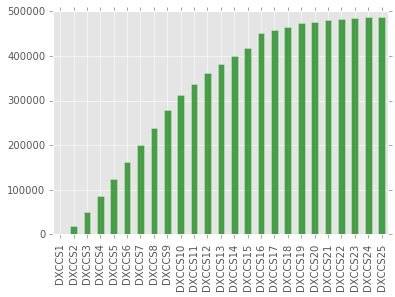

In [10]:

DX25.na.plot.bar(alpha=0.7, colormap='ocean')

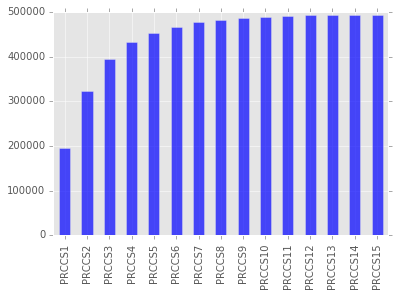

In [13]:
PRCCS = na[na.index.str.contains('PRCCS')]
PRCCS= PRCCS.sort_values('na')
PRCCS.na.plot.bar(alpha=0.7, colormap='brg')

In [ ]:
CM29 = CM29.T
CM29.plot.bar(alpha=0.7, colormap='ocean')

In [ ]:
cols = [c for c in na.columns if  c.upper()[:5] == 'DXCCS']
print(cols)
DX25 = pd.DataFrame(na, index= ['na'], columns=cols)